In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


## About Dataset
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission
* Owner

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## Workkflow 
Step 1 - Understanding of data
* Basic info
* columns
* shape
* stats data

Step 2 - Data cleaning

Step 3 - Fetching Insights
 
Step 4 - Insights

# Step 1 - Understanding of data

In [4]:
df.shape

(4340, 8)

### There are 4340 rows and 8 columns

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
## Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### There are no null values 

In [8]:
df.duplicated().sum()

763

### There are 763 duplicate values  

# Step 2 - Data cleaning

In [9]:
## Checking outliers in data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


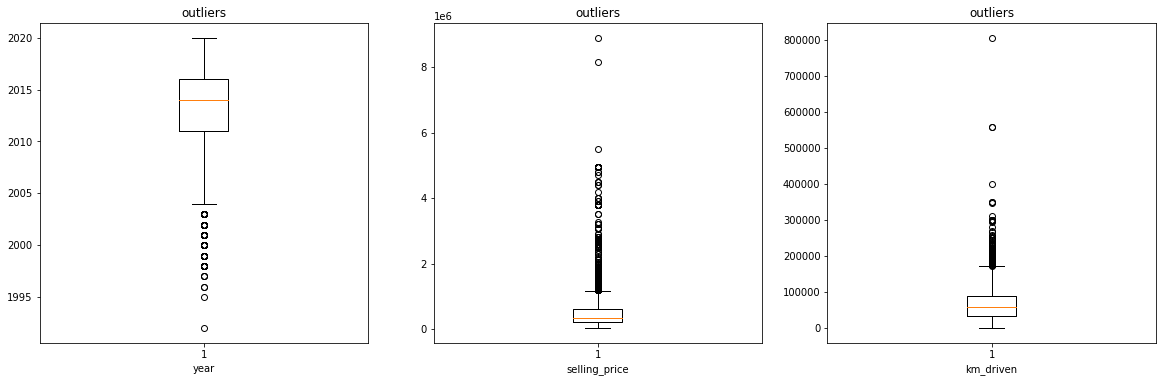

In [10]:
l=["year","selling_price","km_driven"]
p=1
plt.figure(figsize=(20,20))
for i in l:
    plt.subplot(3,3,p)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.title("outliers")
    p=p+1

### There were outliers in the data 

In [11]:
## Checking correlation
df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<AxesSubplot:>

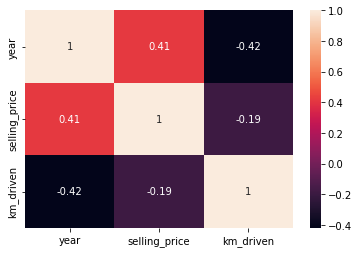

In [12]:
sns.heatmap(df.corr(),annot=True,data=df)

### There is no strong correlation between any of them 

In [13]:
df["name"].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [14]:
## Checking uniques values
for i in df.columns:
    print(i,"------",df[i].unique())

name ------ ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
year ------ [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
selling_price ------ [  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  175000
 2500000  628000  399000  315000  780000  434000  6

# Step -3 Fetching Insights 

In [15]:
sns.set(style="darkgrid")

In [16]:
## Checking sample
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4055,Tata Nexon 1.2 Revotron XZ Plus Dual Tone,2017,750000,15000,Petrol,Individual,Manual,First Owner
2693,Ford Ecosport 1.5 DV5 MT Titanium,2014,550000,110000,Diesel,Individual,Manual,First Owner
2912,Honda City i DTEC E,2014,350000,60000,Diesel,Individual,Manual,Second Owner
1362,Toyota Innova 2.5 VX (Diesel) 7 Seater,2015,1200000,70000,Diesel,Individual,Manual,Third Owner
4024,Toyota Innova 2.5 VX 8 STR,2012,800000,108731,Diesel,Individual,Manual,First Owner


In [17]:
df["owner"].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [18]:
## How many cars are of diesel, petrol,cng, lpg, electric
df["fuel"].value_counts().reset_index()

,index,fuel
0,Diesel,2153
1,Petrol,2123
2,CNG,40
3,LPG,23
4,Electric,1


<AxesSubplot:xlabel='fuel', ylabel='count'>

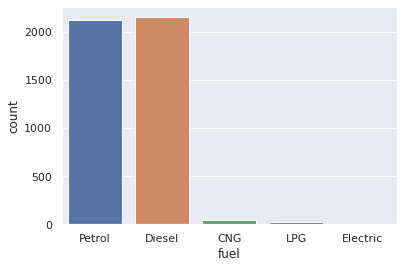

In [19]:
sns.countplot(x="fuel",data=df)

In [20]:
## how many are seller type
df["seller_type"].value_counts().reset_index()

,index,seller_type
0,Individual,3244
1,Dealer,994
2,Trustmark Dealer,102


<AxesSubplot:xlabel='seller_type', ylabel='count'>

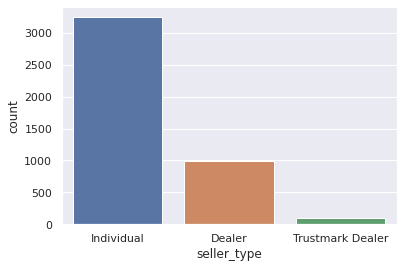

In [21]:
sns.countplot(x="seller_type",data=df)

In [22]:
### which is the maximum, minimum and average km driven 
df["km_driven"].agg(["max","min","mean"]).reset_index()


,index,km_driven
0,max,806599.000000
1,min,1.000000
2,mean,66215.777419


In [23]:
## which was the highest driven car
df[df["km_driven"]==df["km_driven"].max()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner


In [24]:
## which was the lowest driven car
df[df["km_driven"]==df["km_driven"].min()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner


In [25]:
## Which is the highest selling car
df[df["selling_price"]==df["selling_price"].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


In [26]:
## Which is the lowest selling car
df[df["selling_price"]==df["selling_price"].min()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Petrol,Individual,Manual,Second Owner


Manual       3892
Automatic     448
Name: transmission, dtype: int64


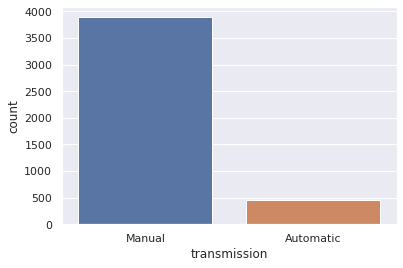

In [27]:
## How many are automatic and manual cars
print(df["transmission"].value_counts())
sns.countplot(x="transmission",data=df);


### Manual cars were more than automatic 

In [28]:
## which year cars are more
df["year"].value_counts().reset_index()

,index,year
0,2017,466
1,2015,421
2,2012,415
3,2013,386
4,2014,367
5,2018,366
6,2016,357
7,2011,271
8,2010,234
9,2019,195


### 2017 cars are more 

In [29]:
## Lets find the age of the car
df["year"].max()

2020

In [30]:
df["age"]=df["year"].max()-df["year"]

In [31]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4


In [32]:
## Which car is the Newest in age 
df[df["age"]==df["age"].min()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
158,Maruti Wagon R LXI,2020,240000,120000,Petrol,Individual,Manual,First Owner,0
176,Maruti Alto K10 LXI CNG,2020,282000,40000,CNG,Individual,Manual,First Owner,0
289,Mahindra XUV500 W11 Option AWD,2020,1400000,25000,Diesel,Dealer,Manual,First Owner,0
694,Hyundai Grand i10 Nios Magna CRDi,2020,700000,1400,Diesel,Individual,Manual,First Owner,0
963,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner,0
1002,Hyundai Creta 1.4 EX Diesel,2020,1050000,10000,Diesel,Individual,Manual,First Owner,0
1195,Maruti Baleno Zeta,2020,700000,1100,Petrol,Individual,Manual,First Owner,0
1291,Maruti Alto 800 VXI,2020,350000,1000,Petrol,Individual,Manual,First Owner,0
1324,Maruti Swift VXI,2020,619000,1500,Petrol,Individual,Manual,First Owner,0
1409,Volkswagen Polo 1.0 TSI Highline Plus,2020,802000,5000,Petrol,Individual,Manual,First Owner,0


In [33]:
## Which car is the Oldest in age 
df[df["age"]==df["age"].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
3334,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner,28


In [34]:
## how many cars have drove above 100,000 km
len(df[df["km_driven"]>100000]["km_driven"])

720

In [35]:
df["name"].nunique()

1491

In [36]:
df["brand name"]=df["name"].str.split(" ",expand=True)[0]

In [37]:
df["brand name"].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand name, dtype: int64

In [38]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand name
3295,Hyundai i10 Era 1.1 iTech SE,2011,300000,20000,Petrol,Individual,Manual,First Owner,9,Hyundai
1235,Volkswagen Vento Diesel Style Limited Edition,2013,340000,85000,Diesel,Individual,Manual,Second Owner,7,Volkswagen
2834,Maruti Alto 800 Std Optional,2019,240000,5000,Petrol,Individual,Manual,First Owner,1,Maruti
3247,Ford Figo Petrol EXI,2014,350000,90000,Petrol,Individual,Manual,Second Owner,6,Ford
182,Maruti Ciaz 1.4 Delta,2018,650000,70000,Petrol,Individual,Manual,First Owner,2,Maruti


In [39]:
## What is the average, min and max selling price according with brand name
df.groupby("brand name")["selling_price"].agg(["min","max","mean"]).sort_values(by="max",ascending=False)

,min,max,mean
brand name,,,
Audi,650000,8900000,1.931633e+06
Mercedes-Benz,350000,8150000,2.776657e+06
BMW,480000,4950000,2.945385e+06
Volvo,1750000,4500000,2.556250e+06
Land,2349000,4200000,3.609800e+06
Ford,20000,3200000,5.712731e+05
Toyota,95000,3200000,9.243592e+05
Mahindra,80000,2700000,5.877095e+05
Jaguar,1800000,2550000,2.069166e+06


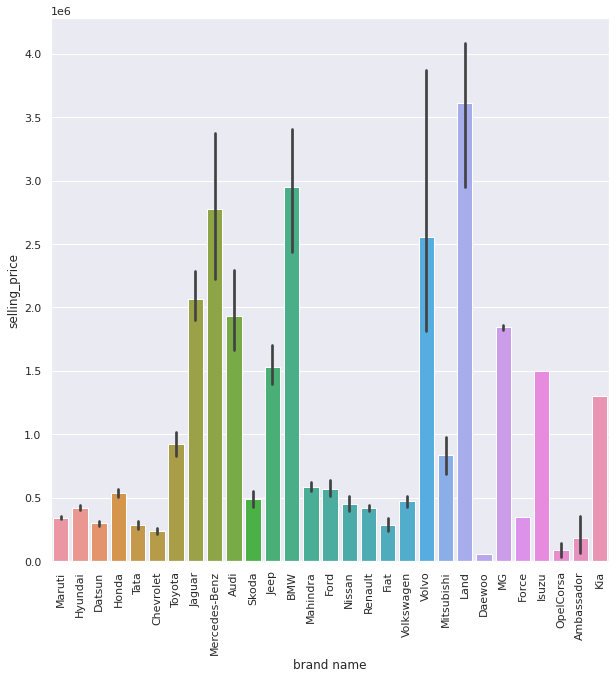

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x="brand name",y="selling_price",data=df)
plt.xticks(rotation=90);


In [41]:
## Automatic cars are of which brands
df[df["transmission"]=="Automatic"]["brand name"].value_counts()

Hyundai          77
Audi             60
Maruti           52
BMW              39
Toyota           35
Mercedes-Benz    33
Honda            26
Skoda            25
Mahindra         22
Volkswagen       21
Ford             19
Tata              7
Jaguar            6
Renault           6
Land              5
Chevrolet         5
Volvo             4
Datsun            2
Mitsubishi        1
Nissan            1
Kia               1
MG                1
Name: brand name, dtype: int64

In [42]:
df.groupby("brand name")["seller_type"].value_counts()

brand name     seller_type     
Ambassador     Individual             4
Audi           Dealer                47
               Individual            13
BMW            Dealer                20
               Individual            19
Chevrolet      Individual           152
               Dealer                36
Daewoo         Individual             1
Datsun         Individual            28
               Dealer                 9
Fiat           Individual            33
               Dealer                 4
Force          Individual             1
Ford           Individual           134
               Dealer               103
               Trustmark Dealer       1
Honda          Individual           141
               Dealer               104
               Trustmark Dealer       7
Hyundai        Individual           598
               Dealer               206
               Trustmark Dealer      17
Isuzu          Individual             1
Jaguar         Dealer                 3
        

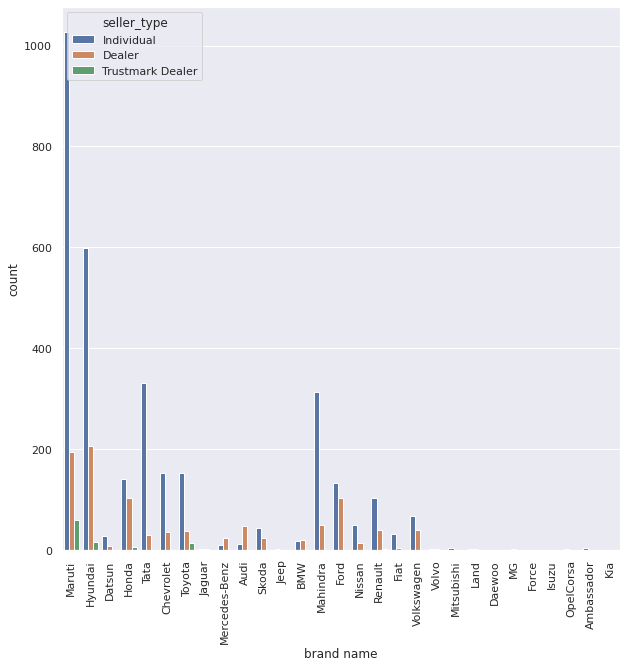

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(x="brand name",hue="seller_type",data=df)
plt.xticks(rotation=90);


In [44]:
df.groupby("brand name")["year"].max()

brand name
Ambassador       2012
Audi             2020
BMW              2019
Chevrolet        2017
Daewoo           2002
Datsun           2019
Fiat             2018
Force            2014
Ford             2020
Honda            2020
Hyundai          2020
Isuzu            2018
Jaguar           2014
Jeep             2019
Kia              2019
Land             2018
MG               2019
Mahindra         2020
Maruti           2020
Mercedes-Benz    2018
Mitsubishi       2012
Nissan           2019
OpelCorsa        2004
Renault          2020
Skoda            2019
Tata             2020
Toyota           2019
Volkswagen       2020
Volvo            2018
Name: year, dtype: int64

In [45]:
## Brands with their average km driven
df.groupby("brand name")["km_driven"].mean().sort_values(ascending=False)

brand name
Mitsubishi       141311.666667
Toyota           100396.014563
Land              87600.000000
Volvo             86748.000000
OpelCorsa         86500.000000
Mahindra          83098.309589
Skoda             82591.397059
Fiat              79822.648649
Tata              75933.714681
Volkswagen        74776.112150
Chevrolet         72217.218085
Nissan            68684.515625
Ambassador        67500.000000
Ford              65041.399160
Audi              64459.716667
Maruti            63264.387500
Honda             57080.805556
Hyundai           55767.695493
Jaguar            52454.333333
Daewoo            50000.000000
Renault           47421.287671
BMW               44883.179487
Mercedes-Benz     42946.571429
Isuzu             40000.000000
Force             37516.000000
Datsun            29564.351351
Jeep              27346.000000
MG                16000.000000
Kia               10000.000000
Name: km_driven, dtype: float64

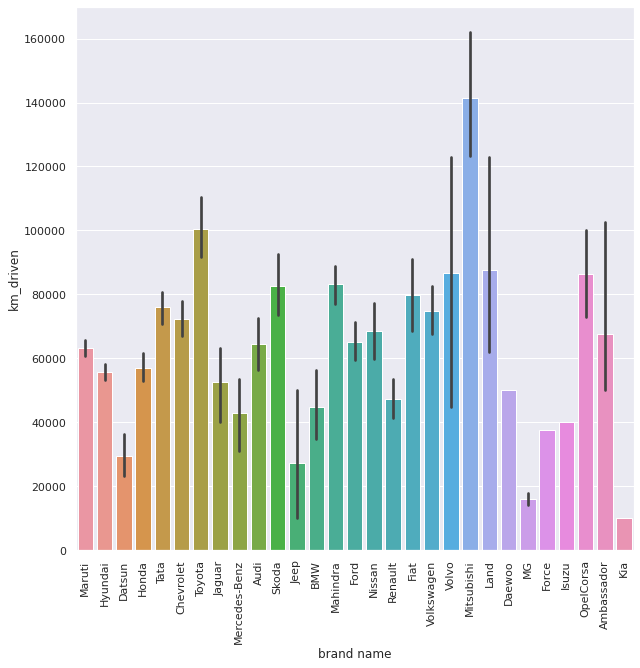

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(x="brand name",y="km_driven",data=df)
plt.xticks(rotation=90);


In [47]:
df.groupby("brand name")["fuel"].value_counts().sort_values(ascending=False)

brand name     fuel    
Maruti         Petrol      852
Hyundai        Petrol      562
Maruti         Diesel      384
Mahindra       Diesel      350
Hyundai        Diesel      243
Tata           Diesel      233
Toyota         Diesel      166
Ford           Diesel      164
Honda          Petrol      155
Tata           Petrol      127
Honda          Diesel       97
Chevrolet      Diesel       97
               Petrol       89
Renault        Diesel       77
Ford           Petrol       74
Volkswagen     Diesel       74
Renault        Petrol       69
Skoda          Diesel       53
Audi           Diesel       52
Nissan         Diesel       44
Toyota         Petrol       39
BMW            Diesel       38
Datsun         Petrol       37
Volkswagen     Petrol       33
Maruti         CNG          30
Mercedes-Benz  Diesel       29
Fiat           Diesel       27
Nissan         Petrol       20
Skoda          Petrol       15
Mahindra       Petrol       15
Maruti         LPG          14
Fiat           

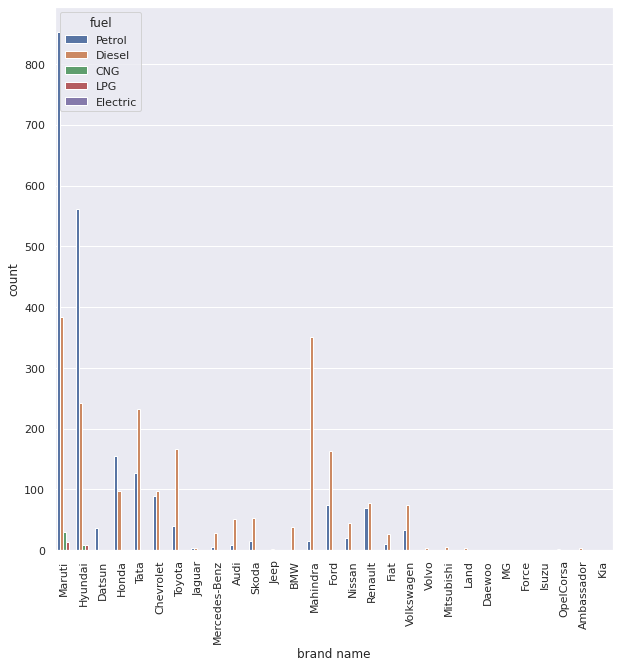

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(x="brand name",hue="fuel",data=df)
plt.xticks(rotation=90);


In [49]:
## Manual cars are of which brands
df[df["transmission"]=="Manual"]["brand name"].value_counts()

Maruti           1228
Hyundai           744
Tata              354
Mahindra          343
Honda             226
Ford              219
Chevrolet         183
Toyota            171
Renault           140
Volkswagen         86
Nissan             63
Skoda              43
Fiat               37
Datsun             35
Mitsubishi          5
Ambassador          4
Jeep                3
Mercedes-Benz       2
OpelCorsa           2
Daewoo              1
MG                  1
Force               1
Isuzu               1
Name: brand name, dtype: int64

# Insights

* First car owners were more than second and third car owners.
* Diesel cars are more than others but there is very less different between petrol  and diesel cars.
* Individual seller types were far more than dealers and trustmark dealer.
* Maruti Swift 2009 is the highest driven car were as Mahindra Quanto 2014 is the minimum driven car.
* Audi Rs7 2020 is the car with highest selling car were as Ford Ikon 2005 is the car with least selling price.
* Manual cars were far more than automatic cars.
* I have made 2 columns i.e Brand name and age through Feature engineering to get more insights of the data.
* Maruti 800 is the oldest car which is of 1992.
* There are more than 700 cars who have more than 1 lakhs Km driven.
* Hyundai automatic cars were more than other brands car.
* Mitsubishi cars have more average km driven than other brands car
* In manual cars Maruti is the leader who has more no of cars 

